In [12]:
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from bag_reader.bag_reader import READER
from bag_processor.bag_processor import DepthProcessor


bag_read = READER('/home/nimibot/catkin_ws/src/ros_env_prediction/env_recorder_pkg/bag/2022-10-27-12-42-56.bag')
bag_read.read()
bag_read.depth_df

dp = DepthProcessor()
feat_df = dp.get_features_df(bag_read.depth_df)


[INFO]  Data folder /home/nimibot/catkin_ws/src/ros_env_prediction/env_recorder_pkg/bag/2022-10-27-12-42-56 already exists. Not creating.


In [9]:
# level ground
mean36 = feat_df["mean"][:36].mean()
std36 = feat_df["std"][:36].mean()
print(mean36)
print("")
print(std36)

[[0.92561919 1.4159303  1.54921176 0.97777382]
 [0.92927775 1.30209818 1.34194837 0.98968489]
 [0.92342167 1.11332847 1.17404347 1.02067937]]

[[0.11251775 0.19213019 0.1710821  0.18496821]
 [0.11660472 0.10877433 0.10571281 0.17065385]
 [0.10010286 0.20572733 0.17916    0.22675943]]


In [10]:
# stairs ascent
mean61 = feat_df["mean"][36:61].mean()
std61 = feat_df["std"][36:61].mean()
print(mean61)
print("")
print(std61)

[[0.66705011 0.9664952  0.99833069 0.91432389]
 [0.7093814  0.96092082 1.00301691 1.39097287]
 [0.76429224 0.75922795 0.89524492 1.39458814]]

[[0.09626439 0.07122153 0.07252688 0.29779845]
 [0.11243589 0.11858445 0.18648706 0.5143514 ]
 [0.20104294 0.21947085 0.31119093 0.41405111]]


In [11]:
# stairs descent
mean92 = feat_df["mean"][75:92].mean()
std92 = feat_df["std"][75:92].mean()
print(mean92)
print("")
print(std92)

[[2.20190152 2.46389529 2.14267068 0.82302298]
 [1.79460625 1.65874033 1.68002976 0.74448641]
 [0.9087014  1.15314253 1.22082222 0.69304378]]

[[0.29966939 0.43863046 0.61779628 0.15555453]
 [0.52736142 0.5457647  0.38960071 0.1479723 ]
 [0.64448365 0.44271264 0.27146912 0.13197838]]


/home/nimibot/py3.7_ws/py3.7_venv/lib/python3.7/site-packages/ipykernel_launcher.py:12: RuntimeWarning: divide by zero encountered in int_scalars
  if sys.path[0] == "":


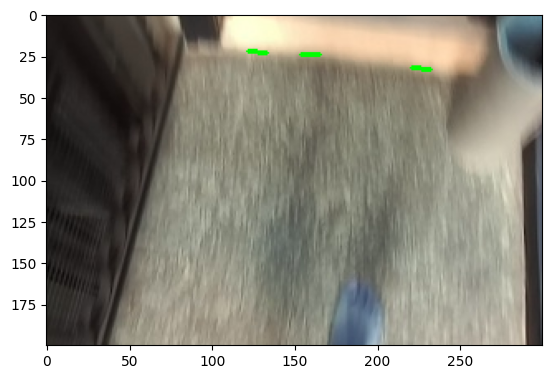

In [220]:
depth_img = cv2.imread(bag_read.rgb_df.frame_path[41])
depth_img = depth_img[100:300,150:450]
gray = cv2.cvtColor(depth_img,cv2.COLOR_BGR2GRAY)
blured = cv2.GaussianBlur(depth_img,(5,5),0,0)
edges = cv2.Canny(blured,20,150,apertureSize = 3)
#lines = cv2.HoughLines(edges,1,np.pi/180,200)
minLineLength = 100
maxLineGap = 10
lines = cv2.HoughLinesP(edges,1,np.pi/180,20,minLineLength,maxLineGap)
for line in lines:
    for x1,y1,x2,y2 in line:
        m = (y1-y2)/(x1-x2)
        
        if np.rad2deg(np.arctan(m))<15 and np.rad2deg(np.arctan(m))>-15 : 
            #print(np.rad2deg(np.arctan(m)))
            cv2.line(depth_img,(x1,y1),(x2,y2),(0,255,0),2)

plt.imshow(depth_img)
